c:\Users\bkrmp\Desktop\River Monitor\env\lib\site-packages\rasterio\__init__.py:334: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


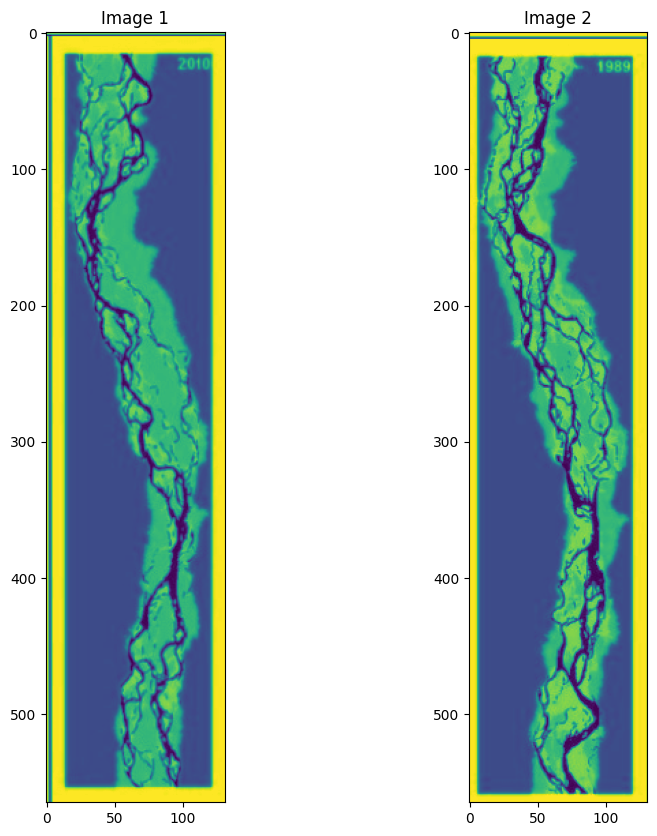

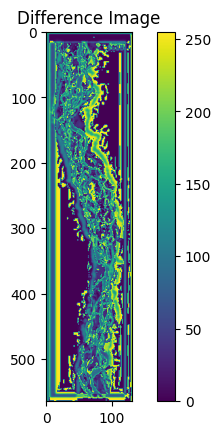

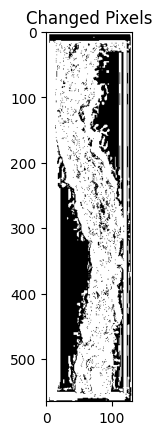

In [22]:
# Import necessary libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the two remote sensing images
image1 = rasterio.open('input1.jpg')
image2 = rasterio.open('input2.jpg')

# Register the images
# Here, we are assuming the images are already registered
# If not, you need to use image registration techniques
assert image1.crs == image2.crs
assert image1.width == image2.width
assert image1.height == image2.height

# Compute the difference image
diff = image2.read(1) - image1.read(1)

# Set a threshold for the difference image
threshold = 10

# Identify changed pixels
changed_pixels = np.where(diff > threshold)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(image1.read(1))
axs[0].set_title('Image 1')
axs[1].imshow(image2.read(1))
axs[1].set_title('Image 2')
plt.show()

plt.imshow(diff)
plt.colorbar()
plt.title('Difference Image')
plt.show()

plt.imshow(diff > threshold, cmap='gray')
plt.title('Changed Pixels')
plt.show()
